<a href="https://colab.research.google.com/github/StillWork/AIDD-2208-add/blob/main/c_84_3_Molecular_Fingerprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Molecular Fingerprint
- 특성 표현법 소개
- Fingerprint 설명
- MLP 모델을 사용한 12가지 독성 예측 예

## Fingerprint

- 머신러닝 모델은 규격화된 (약속된 포맷의) 입력을 필요로 한다
- 분자는 구성 원자가 모두 달라서 이러한 표현법에 어려움이 있다
- Fingerprints는 각 분자의 특성을 일정한 길이의 비트 패턴으로 표현하는 기법이다 
- 두 분자의 특성이 유사하다면 Fingerprint의 같은 위치의 비트값이 일치하는 수가 많도록 하였다
- Extended Connectivity Fingerprint (ECFP)
 - 이를 circular fingerprints라고도 부른다
 - 각 원자의 특성과 결합 등을 기반으로 만들며, 원형으로 주변의 원자들과의 연결 정보를 추가하여 특성을 업데이트 하는 방식이다
 - 보통 2회 수행한다

# import

In [1]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 28.2 MB/s 
     |████████████████████████████████| 36.8 MB 39 kB/s 


In [2]:
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import pandas as pd
IPythonConsole.ipython_useSVG=True
%config InlineBackend.figure_format = 'retina'

# FingerPrint 생성 방법

## 샘플 smiles

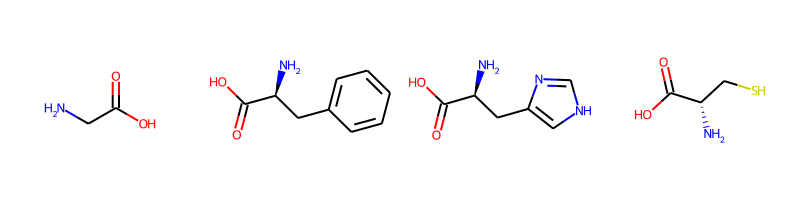

In [3]:
smiles_list = ['C(C(=O)O)N', 'N[C@@H](CC1=CC=CC=C1)C(O)=O', 'O=C([C@H](CC1=CNC=N1)N)O', 'C([C@@H](C(=O)O)N)S']
mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)
img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img

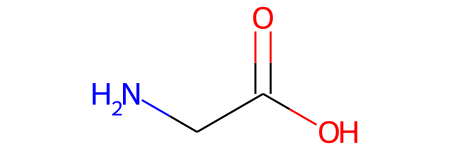

In [4]:
glycine = mol_list[0]
glycine

- MorganFingerprint를 얻고 값이 1인 위치를 찾는다

In [15]:
bi= {}
fp = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024, bitInfo=bi)
print(fp)
fp_arr = np.zeros((1,)) 
print(fp_arr)
DataStructs.ConvertToNumpyArray(fp,fp_arr)
print(fp_arr[:30])
print(fp_arr.sum())
print(np.nonzero(fp_arr))

[0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0.]
10.0
(array([ 27,  80, 147, 389, 650, 713, 807, 893, 966, 981]),)


In [16]:
print(type(fp))
print(type(fp_arr))
print(len(fp))

<class 'rdkit.DataStructs.cDataStructs.ExplicitBitVect'>
<class 'numpy.ndarray'>
1024


## Fingerprint 비트정보 보기
- GetOnBits() 함수 사용

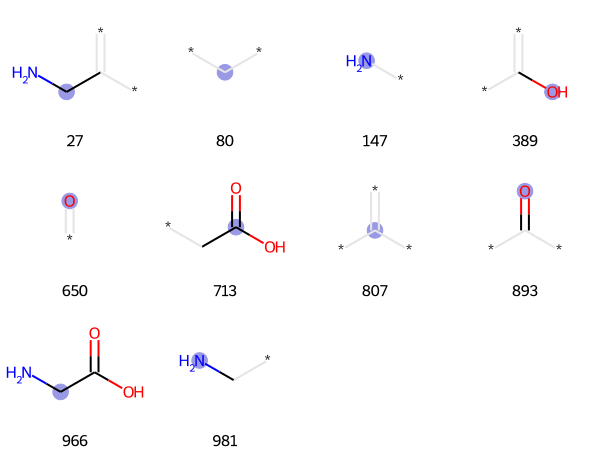

In [18]:
points = [(glycine, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(points, molsPerRow=4, legends = [str(x) for x in fp.GetOnBits()])

In [19]:
points

[(<rdkit.Chem.rdchem.Mol at 0x7f1fa7519440>,
  27,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x7f1fa7519440>,
  80,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x7f1fa7519440>,
  147,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdkit.Chem.rdchem.Mol at 0x7f1fa7519440>,
  389,
  {27: ((0, 1),),
   80: ((0, 0),),
   147: ((4, 0),),
   389: ((3, 1),),
   650: ((2, 0),),
   713: ((1, 1),),
   807: ((1, 0), (3, 0)),
   893: ((2, 1),),
   966: ((0, 2),),
   981: ((4, 1),)}),
 (<rdk

## 두 분자 사이의 유사도 비교

- Tanimoto Similarity
 - 전체 원소 대비 공통부분의 비율

- glycine, cysteine 비교

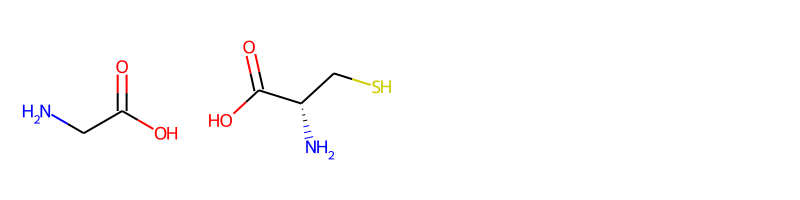

In [20]:
cysteine = mol_list[3]
img = Draw.MolsToGridImage([glycine, cysteine], molsPerRow=4)
img

In [21]:
fp2 = AllChem.GetMorganFingerprintAsBitVect(cysteine, 2, nBits=1024, bitInfo=bi)
print('cysteine',list(fp2.GetOnBits()))
print('glycine',list(fp.GetOnBits()))

cysteine [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
glycine [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]


In [24]:
common = set(fp2.GetOnBits()) & set(fp.GetOnBits())
combined = set(fp2.GetOnBits()) | set(fp.GetOnBits())
print(common)
print(combined)

# 직접 계산
print(len(common)/len(combined))

# TanimotoSimilarity()를 사용하는 방법
print(DataStructs.TanimotoSimilarity(fp, fp2))

{389, 807, 650, 80, 147, 893}
{1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}
0.3
0.3


# Dataset을 로드하면서 특성 선택하기
- load_tox21() 사용 예
 - Tox21는 분자의 독성정보 데이터



In [25]:
tasks, datasets, transformers = dc.molnet.load_tox21(featurizer='ECFP')
train_dataset, valid_dataset, test_dataset = datasets
print(train_dataset)

<DiskDataset X.shape: (6264, 1024), y.shape: (6264, 12), w.shape: (6264, 12), task_names: ['NR-AR' 'NR-AR-LBD' 'NR-AhR' ... 'SR-HSE' 'SR-MMP' 'SR-p53']>


In [26]:
transformers

In [27]:
train_dataset.w

array([[1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 1.17464996,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 1.17464996,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 0.        ,
        1.05288369],
       ...,
       [1.04502242, 0.        , 1.12502653, ..., 1.05576503, 6.7257384 ,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 1.05576503, 6.7257384 ,
        1.05288369],
       [1.04502242, 1.03632599, 1.12502653, ..., 0.        , 1.17464996,
        1.05288369]])

- `y`의 모양이 (6264, 12)이며 이는 12가지의 멀티태스크가 있음을 나타낸다
- w (가중치)의 의미
 - 이 값이 0이면 결측치를 나타낸다. 해당 샘플에 대해서는 손실함수나 성능평가 시에 무시하도록 한다
 - 이 값은 대부분의 경우 1 또는 1 근처의 값을 갖는다
 - 이 값은 각 태스크별로 레이블 분포의 불균형을 보완하기 위해서 사용된다
 - 12개 태스크가 균등하게 성능에 기여하도록 조정하는데 사용된다.


## Fringerprint를 사용한 독성 예측

- MLP 모델을 사용 (한개의 히든 계층 사용)
- 12개의 이진 분류 태스크를 수행
- auc와 accuracy를 측정

In [35]:
model = dc.models.MultitaskClassifier(n_tasks=12, n_features=1024, layer_sizes=[1000])
model.fit(train_dataset, nb_epoch=20)
metric1 = dc.metrics.Metric(dc.metrics.roc_auc_score)
metric2 = dc.metrics.Metric(dc.metrics.accuracy_score)
print('training set score:', model.evaluate(train_dataset, [metric1, metric2], transformers))
print('test set score:', model.evaluate(test_dataset, [metric1, metric2], transformers))

training set score: {'roc_auc_score': 0.9749084249087031, 'accuracy_score': 0.917398361004683}
test set score: {'roc_auc_score': 0.6744832540859882, 'accuracy_score': 0.8358843537414966}
